# Analysis of a P-Doped Semiconductor 
#### By Fritz Ahern

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.constants as cn
from sympy.interactive import printing
printing.init_printing(use_latex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (15,10)

## Importing data from 5 different currents 

In [22]:
Run1=pd.read_csv("1micro_A_actual.txt",sep='\t', header = 2)
Run2=pd.read_csv("1mA_2500G.txt",sep='\t',header=2)
Run3=pd.read_csv("3mA_5000G.txt",sep='\t',header=2)
Run4=pd.read_csv("5mA_5000G.txt",sep='\t',header=2)
Run5=pd.read_csv("9mA_5000G.txt",sep='\t',header=2)
pd.DataFrame.head(Run5)

,Temperature (K),B-Field (Gauss),sample current AB,sample current AD,sample current AC,sample current BD,sample current -AB,sample current -AD,sample current -AC,sample current -BD,Voltage CD,Voltage BC,Voltage BD,Voltage AC,Voltage -CD,Voltage -BC,Voltage -BD,Voltage -AC,Unnamed: 18
0,96.020,3950.000000,0.000493,0.000509,0.000491,0.000444,-0.000491,-0.000507,-0.000490,-0.000443,0.199807,0.258928,0.461917,0.348729,-0.200052,-0.259636,-0.462955,-0.348160,NaN
1,97.285,124.250000,0.000683,0.000706,0.000681,0.000613,-0.000680,-0.000702,-0.000678,-0.000610,0.209037,0.255171,0.043433,-0.028525,-0.209278,-0.256070,-0.044825,0.028573,NaN
2,98.560,-3781.000000,0.000486,0.000501,0.000483,0.000438,-0.000484,-0.000499,-0.000482,-0.000436,0.203943,0.237925,-0.379745,-0.413571,-0.204111,-0.239104,0.377787,0.413018,NaN
3,100.165,3951.000000,0.000481,0.000496,0.000478,0.000433,-0.000479,-0.000494,-0.000477,-0.000431,0.200396,0.259398,0.452118,0.339385,-0.200675,-0.260135,-0.452783,-0.338489,NaN
4,101.545,124.260002,0.000658,0.000680,0.000656,0.000590,-0.000655,-0.000676,-0.000653,-0.000587,0.209181,0.255429,0.043388,-0.028791,-0.209438,-0.256343,-0.044761,0.028864,NaN


## Plotting Hall Coefficient for each current vs. temperature
#### We seperate the desired variables from the 5 matrixs then run them through the theoretical hall coeiffient function, this function is roughly derived in my report which can be found in my github

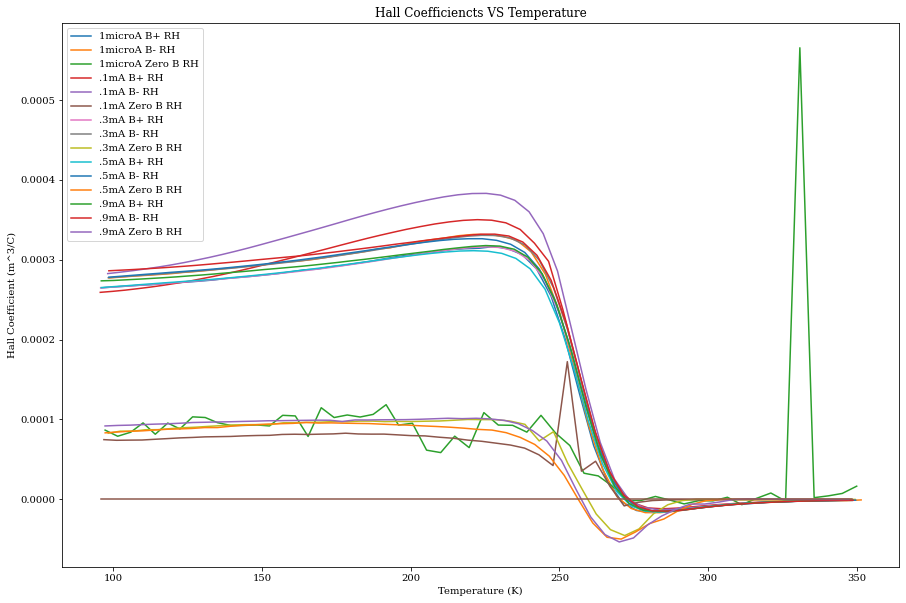

In [23]:
# d is the thickenss of the semiconductor
d=.00125
#temp Run1
Temp_axis_ps1=Run1["Temperature (K)"][::3]
Temp_axis_ng1=Run1["Temperature (K)"][2::3]
Temp_axis_01=Run1["Temperature (K)"][1::3]

#postive B field Rh parameters Run1
Vac1=Run1["Voltage AC"][::3]
Vmac1=Run1["Voltage -AC"][::3]
Ibd1=Run1["sample current BD"][::3]
Imbd1=Run1["sample current -BD"][::3]
Vbd1=Run1["Voltage BD"][::3]
Vmbd1=Run1["Voltage -BD"][::3]
Iac1=Run1["sample current AC"][::3]
Imac1=Run1["sample current -AC"][::3]
Bp1=Run1["B-Field (Gauss)"][::3]

#negative B field Rh parameters Run1
Vacn1=Run1["Voltage AC"][2::3]
Vmacn1=Run1["Voltage -AC"][2::3]
Ibdn1=Run1["sample current BD"][2::3]
Imbdn1=Run1["sample current -BD"][2::3]
Vbdn1=Run1["Voltage BD"][2::3]
Vmbdn1=Run1["Voltage -BD"][2::3]
Iacn1=Run1["sample current AC"][2::3]
Imacn1=Run1["sample current -AC"][2::3]
Bn1=Run1["B-Field (Gauss)"][2::3]

#zero B field Rh parameters Run1
Vac01=Run1["Voltage AC"][1::3]
Vmac01=Run1["Voltage -AC"][1::3]
Ibd01=Run1["sample current BD"][1::3]
Imbd01=Run1["sample current -BD"][1::3]
Vbd01=Run1["Voltage BD"][1::3]
Vmbd01=Run1["Voltage -BD"][1::3]
Iac01=Run1["sample current AC"][1::3]
Imac01=Run1["sample current -AC"][1::3]
B01=Run1["B-Field (Gauss)"][1::3]

#temp Run2
Temp_axis_ps2=Run2["Temperature (K)"][::3]
Temp_axis_ng2=Run2["Temperature (K)"][2::3]
Temp_axis_02=Run2["Temperature (K)"][1::3]

#postive B field Rh parameters Run2
Vac2=Run2["Voltage AC"][::3]
Vmac2=Run2["Voltage -AC"][::3]
Ibd2=Run2["sample current BD"][::3]
Imbd2=Run2["sample current -BD"][::3]
Vbd2=Run2["Voltage BD"][::3]
Vmbd2=Run2["Voltage -BD"][::3]
Iac2=Run2["sample current AC"][::3]
Imac2=Run2["sample current -AC"][::3]
Bp2=Run2["B-Field (Gauss)"][::3]

#negative B field Rh parameters Run2
Vacn2=Run2["Voltage AC"][2::3]
Vmacn2=Run2["Voltage -AC"][2::3]
Ibdn2=Run2["sample current BD"][2::3]
Imbdn2=Run2["sample current -BD"][2::3]
Vbdn2=Run2["Voltage BD"][2::3]
Vmbdn2=Run2["Voltage -BD"][2::3]
Iacn2=Run2["sample current AC"][2::3]
Imacn2=Run2["sample current -AC"][2::3]
Bn2=Run2["B-Field (Gauss)"][2::3]

#zero B field Rh parameters Run2
Vac02=Run2["Voltage AC"][1::3]
Vmac02=Run2["Voltage -AC"][1::3]
Ibd02=Run2["sample current BD"][1::3]
Imbd02=Run2["sample current -BD"][1::3]
Vbd02=Run2["Voltage BD"][1::3]
Vmbd02=Run2["Voltage -BD"][1::3]
Iac02=Run2["sample current AC"][1::3]
Imac02=Run2["sample current -AC"][1::3]
B02=Run2["B-Field (Gauss)"][1::3]

#temp Run3
Temp_axis_ps3=Run3["Temperature (K)"][::3]
Temp_axis_ng3=Run3["Temperature (K)"][2::3]
Temp_axis_03=Run3["Temperature (K)"][2::3]

#postive B field Rh parameters Run3
Vac3=Run3["Voltage AC"][::3]
Vmac3=Run3["Voltage -AC"][::3]
Ibd3=Run3["sample current BD"][::3]
Imbd3=Run3["sample current -BD"][::3]
Vbd3=Run3["Voltage BD"][::3]
Vmbd3=Run3["Voltage -BD"][::3]
Iac3=Run3["sample current AC"][::3]
Imac3=Run3["sample current -AC"][::3]
Bp3=Run3["B-Field (Gauss)"][::3]

#negative B field Rh parameters Run3
Vacn3=Run3["Voltage AC"][2::3]
Vmacn3=Run3["Voltage -AC"][2::3]
Ibdn3=Run3["sample current BD"][2::3]
Imbdn3=Run3["sample current -BD"][2::3]
Vbdn3=Run3["Voltage BD"][2::3]
Vmbdn3=Run3["Voltage -BD"][2::3]
Iacn3=Run3["sample current AC"][2::3]
Imacn3=Run3["sample current -AC"][2::3]
Bn3=Run3["B-Field (Gauss)"][2::3]

#zero B field Rh parameters Run3
Vac03=Run3["Voltage AC"][1::3]
Vmac03=Run3["Voltage -AC"][1::3]
Ibd03=Run3["sample current BD"][1::3]
Imbd03=Run3["sample current -BD"][1::3]
Vbd03=Run3["Voltage BD"][1::3]
Vmbd03=Run3["Voltage -BD"][1::3]
Iac03=Run3["sample current AC"][1::3]
Imac03=Run3["sample current -AC"][1::3]
B03=Run3["B-Field (Gauss)"][1::3]

#temp Run4
Temp_axis_ps4=Run4["Temperature (K)"][::3]
Temp_axis_ng4=Run4["Temperature (K)"][2::3]
Temp_axis_04=Run4["Temperature (K)"][1::3]

#postive B field Rh parameters Run4
Vac4=Run4["Voltage AC"][::3]
Vmac4=Run4["Voltage -AC"][::3]
Ibd4=Run4["sample current BD"][::3]
Imbd4=Run4["sample current -BD"][::3]
Vbd4=Run4["Voltage BD"][::3]
Vmbd4=Run4["Voltage -BD"][::3]
Iac4=Run4["sample current AC"][::3]
Imac4=Run4["sample current -AC"][::3]
Bp4=Run4["B-Field (Gauss)"][::3]

#negative B field Rh parameters Run4
Vacn4=Run4["Voltage AC"][2::3]
Vmacn4=Run4["Voltage -AC"][2::3]
Ibdn4=Run4["sample current BD"][2::3]
Imbdn4=Run4["sample current -BD"][2::3]
Vbdn4=Run4["Voltage BD"][2::3]
Vmbdn4=Run4["Voltage -BD"][2::3]
Iacn4=Run4["sample current AC"][2::3]
Imacn4=Run4["sample current -AC"][2::3]
Bn4=Run4["B-Field (Gauss)"][2::3]

#zero B field Rh parameters Run4
Vac04=Run4["Voltage AC"][1::3]
Vmac04=Run4["Voltage -AC"][1::3]
Ibd04=Run4["sample current BD"][1::3]
Imbd04=Run4["sample current -BD"][1::3]
Vbd04=Run4["Voltage BD"][1::3]
Vmbd04=Run4["Voltage -BD"][1::3]
Iac04=Run4["sample current AC"][1::3]
Imac04=Run4["sample current -AC"][1::3]
B04=Run4["B-Field (Gauss)"][1::3]

#temp Run5
Temp_axis_ps5=Run5["Temperature (K)"][::3]
Temp_axis_ng5=Run5["Temperature (K)"][2::3]
Temp_axis_05=Run5["Temperature (K)"][1::3]

#postive B field Rh parameters Run5
Vac5=Run5["Voltage AC"][::3]
Vmac5=Run5["Voltage -AC"][::3]
Ibd5=Run5["sample current BD"][::3]
Imbd5=Run5["sample current -BD"][::3]
Vbd5=Run5["Voltage BD"][::3]
Vmbd5=Run5["Voltage -BD"][::3]
Iac5=Run5["sample current AC"][::3]
Imac5=Run5["sample current -AC"][::3]
Bp5=Run5["B-Field (Gauss)"][::3]

#negative B field Rh parameters Run5
Vacn5=Run5["Voltage AC"][2::3]
Vmacn5=Run5["Voltage -AC"][2::3]
Ibdn5=Run5["sample current BD"][2::3]
Imbdn5=Run5["sample current -BD"][2::3]
Vbdn5=Run5["Voltage BD"][2::3]
Vmbdn5=Run5["Voltage -BD"][2::3]
Iacn5=Run5["sample current AC"][2::3]
Imacn5=Run5["sample current -AC"][2::3]
Bn5=Run5["B-Field (Gauss)"][2::3]

#zero B field Rh parameters Run5
Vac05=Run5["Voltage AC"][1::3]
Vmac05=Run5["Voltage -AC"][1::3]
Ibd05=Run5["sample current BD"][1::3]
Imbd05=Run5["sample current -BD"][1::3]
Vbd05=Run5["Voltage BD"][1::3]
Vmbd05=Run5["Voltage -BD"][1::3]
Iac05=Run5["sample current AC"][1::3]
Imac05=Run5["sample current -AC"][1::3]
B05=Run5["B-Field (Gauss)"][1::3]

def RH(Vac,Vmac,Ibd,Imbd,Vbd,Vmbd,Iac,Imac,d,Bp):
    return (((Vac/Ibd+Vmac/Imbd)/2)*(d/Bp)+((Vbd/Iac+Vmbd/Imac)/2)*(d/Bp))/2

plt.plot(Temp_axis_ps1,RH(Vac1,Vmac1,Ibd1,Imbd1,Vbd1,Vmbd1,Iac1,Imac1,d,Bp1),label="1microA B+ RH")
plt.plot(Temp_axis_ng1,RH(Vacn1,Vmacn1,Ibdn1,Imbdn1,Vbdn1,Vmbdn1,Iacn1,Imacn1,d,Bn1),label="1microA B- RH")
plt.plot(Temp_axis_01,RH(Vac01,Vmac01,Ibd01,Imbd01,Vbd01,Vmbd01,Iac01,Imac01,d,B01),label="1microA Zero B RH")

plt.plot(Temp_axis_ps2,RH(Vac2,Vmac2,Ibd2,Imbd2,Vbd2,Vmbd2,Iac2,Imac2,d,Bp2),label=".1mA B+ RH")
plt.plot(Temp_axis_ng2,RH(Vacn2,Vmacn2,Ibdn2,Imbdn2,Vbdn2,Vmbdn2,Iacn2,Imacn2,d,Bn2),label=".1mA B- RH")
plt.plot(Temp_axis_02,RH(Vac02,Vmac02,Ibd02,Imbd02,Vbd02,Vmbd02,Iac02,Imac02,d,B02),label=".1mA Zero B RH")

plt.plot(Temp_axis_ps3,RH(Vac3,Vmac3,Ibd3,Imbd3,Vbd3,Vmbd3,Iac3,Imac3,d,Bp3),label=".3mA B+ RH")
plt.plot(Temp_axis_ng3,RH(Vacn3,Vmacn3,Ibdn3,Imbdn3,Vbdn3,Vmbdn3,Iacn3,Imacn3,d,Bn3),label=".3mA B- RH")
plt.plot(Temp_axis_03,RH(Vac03,Vmac03,Ibd03,Imbd03,Vbd03,Vmbd03,Iac03,Imac03,d,B03),label=".3mA Zero B RH")

plt.plot(Temp_axis_ps4,RH(Vac4,Vmac4,Ibd4,Imbd4,Vbd4,Vmbd4,Iac4,Imac4,d,Bp4),label=".5mA B+ RH")
plt.plot(Temp_axis_ng4,RH(Vacn4,Vmacn4,Ibdn4,Imbdn4,Vbdn4,Vmbdn4,Iacn4,Imacn4,d,Bn4),label=".5mA B- RH")
plt.plot(Temp_axis_04,RH(Vac04,Vmac04,Ibd04,Imbd04,Vbd04,Vmbd04,Iac04,Imac04,d,B04),label=".5mA Zero B RH")

plt.plot(Temp_axis_ps5,RH(Vac5,Vmac5,Ibd5,Imbd5,Vbd5,Vmbd5,Iac5,Imac5,d,Bp5),label=".9mA B+ RH")
plt.plot(Temp_axis_ng5,RH(Vacn5,Vmacn5,Ibdn5,Imbdn5,Vbdn5,Vmbdn5,Iacn5,Imacn5,d,Bn5),label=".9mA B- RH")
plt.plot(Temp_axis_05,RH(Vac05,Vmac05,Ibd05,Imbd05,Vbd05,Vmbd05,Iac05,Imac05,d,B05),label=".9mA Zero B RH")

plt.plot(Temp_axis_ps1,RH(Vac1,Vmac1,Ibd1,Imbd1,Vbd1,Vmbd1,Iac1,Imac1,d,Bp1)*0)
plt.title("Hall Coefficiencts VS Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Hall Coefficient (m^3/C)")
plt.legend()
#Since the Hall Coefficient is positive in the "extrinsic" region we know that the material is p-doped and 
#has mostly holes for charge carriers 

## Averaging the Hall Coefficients

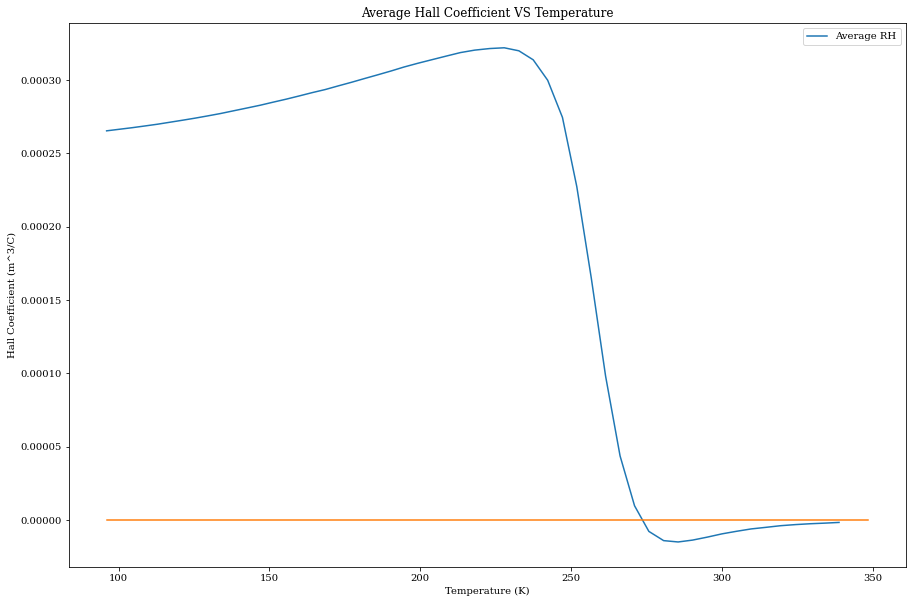

In [15]:
A_RH_ps=(RH(Vac1,Vmac1,Ibd1,Imbd1,Vbd1,Vmbd1,Iac1,Imac1,d,Bp1)+RH(Vac2,Vmac2,Ibd2,Imbd2,Vbd2,Vmbd2,Iac2,Imac2,d,Bp2)+RH(Vac3,Vmac3,Ibd3,Imbd3,Vbd3,Vmbd3,Iac3,Imac3,d,Bp3)+RH(Vac4,Vmac4,Ibd4,Imbd4,Vbd4,Vmbd4,Iac4,Imac4,d,Bp4)+RH(Vac5,Vmac5,Ibd5,Imbd5,Vbd5,Vmbd5,Iac5,Imac5,d,Bp5))/5
A_RH_ng=(RH(Vacn1,Vmacn1,Ibdn1,Imbdn1,Vbdn1,Vmbdn1,Iacn1,Imacn1,d,Bn1)+RH(Vacn2,Vmacn2,Ibdn2,Imbdn2,Vbdn2,Vmbdn2,Iacn2,Imacn2,d,Bn2)+RH(Vacn3,Vmacn3,Ibdn3,Imbdn3,Vbdn3,Vmbdn3,Iacn3,Imacn3,d,Bn3)+RH(Vacn4,Vmacn4,Ibdn4,Imbdn4,Vbdn4,Vmbdn4,Iacn4,Imacn4,d,Bn4)+RH(Vacn5,Vmacn5,Ibdn5,Imbdn5,Vbdn5,Vmbdn5,Iacn5,Imacn5,d,Bn5))/5
A_RH_0=(RH(Vac03,Vmac03,Ibd03,Imbd03,Vbd03,Vmbd03,Iac03,Imac03,d,B03)+RH(Vac04,Vmac04,Ibd04,Imbd04,Vbd04,Vmbd04,Iac04,Imac04,d,B04)+RH(Vac05,Vmac05,Ibd05,Imbd05,Vbd05,Vmbd05,Iac05,Imac05,d,B05))/3
plt.plot(Temp_axis_ps1,A_RH_ps,label="Average RH")
plt.plot(Temp_axis_ps1,RH(Vac1,Vmac1,Ibd1,Imbd1,Vbd1,Vmbd1,Iac1,Imac1,d,Bp1)*0)
plt.title("Average Hall Coefficient VS Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Hall Coefficient (m^3/C)")
plt.legend()

## Plotting the materials Resistivities at different currents vs. temperature
#### We again isolate the desired varibles to run through the theoretical function for resisitivy 

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


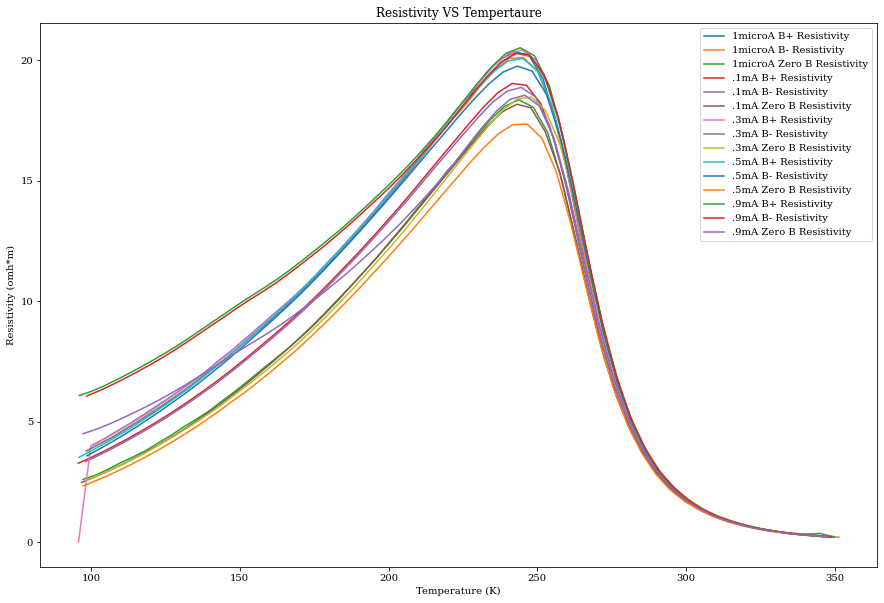

In [16]:
#positive B field resistivity paramters Run1
Iab1=Run1["sample current AB"][::3]
Imab1=Run1["sample current -AB"][::3]
Iad1=Run1["sample current AD"][::3]
Imad1=Run1["sample current -AD"][::3]
Vcd1=Run1["Voltage CD"][::3]
Vmcd1=Run1["Voltage -CD"][::3]
Vbc1=Run1["Voltage BC"][::3]
Vmbc1=Run1["Voltage -BC"][::3]

#negative B field resistivity paramters Run1
Iabn1=Run1["sample current AB"][2::3]
Imabn1=Run1["sample current -AB"][2::3]
Iadn1=Run1["sample current AD"][2::3]
Imadn1=Run1["sample current -AD"][2::3]
Vcdn1=Run1["Voltage CD"][2::3]
Vmcdn1=Run1["Voltage -CD"][2::3]
Vbcn1=Run1["Voltage BC"][2::3]
Vmbcn1=Run1["Voltage -BC"][2::3]

#zero B field resistivity paramters Run1
Iab01=Run1["sample current AB"][1::3]
Imab01=Run1["sample current -AB"][1::3]
Iad01=Run1["sample current AD"][1::3]
Imad01=Run1["sample current -AD"][1::3]
Vcd01=Run1["Voltage CD"][1::3]
Vmcd01=Run1["Voltage -CD"][1::3]
Vbc01=Run1["Voltage BC"][1::3]
Vmbc01=Run1["Voltage -BC"][1::3]

#positive B field resistivity paramters Run2
Iab2=Run2["sample current AB"][::3]
Imab2=Run2["sample current -AB"][::3]
Iad2=Run2["sample current AD"][::3]
Imad2=Run2["sample current -AD"][::3]
Vcd2=Run2["Voltage CD"][::3]
Vmcd2=Run2["Voltage -CD"][::3]
Vbc2=Run2["Voltage BC"][::3]
Vmbc2=Run2["Voltage -BC"][::3]

#negative B field resistivity paramters Run2
Iabn2=Run2["sample current AB"][2::3]
Imabn2=Run2["sample current -AB"][2::3]
Iadn2=Run2["sample current AD"][2::3]
Imadn2=Run2["sample current -AD"][2::3]
Vcdn2=Run2["Voltage CD"][2::3]
Vmcdn2=Run2["Voltage -CD"][2::3]
Vbcn2=Run2["Voltage BC"][2::3]
Vmbcn2=Run2["Voltage -BC"][2::3]

#zero B field resistivity paramters Run2
Iab02=Run2["sample current AB"][1::3]
Imab02=Run2["sample current -AB"][1::3]
Iad02=Run2["sample current AD"][1::3]
Imad02=Run2["sample current -AD"][1::3]
Vcd02=Run2["Voltage CD"][1::3]
Vmcd02=Run2["Voltage -CD"][1::3]
Vbc02=Run2["Voltage BC"][1::3]
Vmbc02=Run2["Voltage -BC"][1::3]

#positive B field resistivity paramters Run3
Iab3=Run3["sample current AB"][::3]
Imab3=Run3["sample current -AB"][::3]
Iad3=Run3["sample current AD"][::3]
Imad3=Run3["sample current -AD"][::3]
Vcd3=Run3["Voltage CD"][::3]
Vmcd3=Run3["Voltage -CD"][::3]
Vbc3=Run3["Voltage BC"][::3]
Vmbc3=Run3["Voltage -BC"][::3]

#negative B field resistivity paramters Run3
Iabn3=Run3["sample current AB"][2::3]
Imabn3=Run3["sample current -AB"][2::3]
Iadn3=Run3["sample current AD"][2::3]
Imadn3=Run3["sample current -AD"][2::3]
Vcdn3=Run3["Voltage CD"][2::3]
Vmcdn3=Run3["Voltage -CD"][2::3]
Vbcn3=Run3["Voltage BC"][2::3]
Vmbcn3=Run3["Voltage -BC"][2::3]

#zero B field resistivity paramters Run3
Iab03=Run3["sample current AB"][1::3]
Imab03=Run3["sample current -AB"][1::3]
Iad03=Run3["sample current AD"][1::3]
Imad03=Run3["sample current -AD"][1::3]
Vcd03=Run3["Voltage CD"][1::3]
Vmcd03=Run3["Voltage -CD"][1::3]
Vbc03=Run3["Voltage BC"][1::3]
Vmbc03=Run3["Voltage -BC"][1::3]

#positive B field resistivity paramters Run4
Iab4=Run4["sample current AB"][::3]
Imab4=Run4["sample current -AB"][::3]
Iad4=Run4["sample current AD"][::3]
Imad4=Run4["sample current -AD"][::3]
Vcd4=Run4["Voltage CD"][::3]
Vmcd4=Run4["Voltage -CD"][::3]
Vbc4=Run4["Voltage BC"][::3]
Vmbc4=Run4["Voltage -BC"][::3]

#negative B field resistivity paramters Run4
Iabn4=Run4["sample current AB"][2::3]
Imabn4=Run4["sample current -AB"][2::3]
Iadn4=Run4["sample current AD"][2::3]
Imadn4=Run4["sample current -AD"][2::3]
Vcdn4=Run4["Voltage CD"][2::3]
Vmcdn4=Run4["Voltage -CD"][2::3]
Vbcn4=Run4["Voltage BC"][2::3]
Vmbcn4=Run4["Voltage -BC"][2::3]

#zero B field resistivity paramters Run4
Iab04=Run4["sample current AB"][1::3]
Imab04=Run4["sample current -AB"][1::3]
Iad04=Run4["sample current AD"][1::3]
Imad04=Run4["sample current -AD"][1::3]
Vcd04=Run4["Voltage CD"][1::3]
Vmcd04=Run4["Voltage -CD"][1::3]
Vbc04=Run4["Voltage BC"][1::3]
Vmbc04=Run4["Voltage -BC"][1::3]

#positive B field resistivity paramters Run5
Iab5=Run5["sample current AB"][::3]
Imab5=Run5["sample current -AB"][::3]
Iad5=Run5["sample current AD"][::3]
Imad5=Run5["sample current -AD"][::3]
Vcd5=Run5["Voltage CD"][::3]
Vmcd5=Run5["Voltage -CD"][::3]
Vbc5=Run5["Voltage BC"][::3]
Vmbc5=Run5["Voltage -BC"][::3]

#negative B field resistivity paramters Run5
Iabn5=Run5["sample current AB"][2::3]
Imabn5=Run5["sample current -AB"][2::3]
Iadn5=Run5["sample current AD"][2::3]
Imadn5=Run5["sample current -AD"][2::3]
Vcdn5=Run5["Voltage CD"][2::3]
Vmcdn5=Run5["Voltage -CD"][2::3]
Vbcn5=Run5["Voltage BC"][2::3]
Vmbcn5=Run5["Voltage -BC"][2::3]

#zero B field resistivity paramters Run5
Iab05=Run5["sample current AB"][1::3]
Imab05=Run5["sample current -AB"][1::3]
Iad05=Run5["sample current AD"][1::3]
Imad05=Run5["sample current -AD"][1::3]
Vcd05=Run5["Voltage CD"][1::3]
Vmcd05=Run5["Voltage -CD"][1::3]
Vbc05=Run5["Voltage BC"][1::3]
Vmbc05=Run5["Voltage -BC"][1::3]

def rho(d,Iab,Imab,Iad,Imad,Vcd,Vmcd,Vbc,Vmbc):
    return (np.pi*d/np.log(2))*(((Vcd/Iab+Vmcd/Imab)/2+(Vbc/Iad+Vmbc/Imad)/2)/2)*1/(np.cosh(np.log(((Vcd/Iab+Vmcd/Imab)/2)/((Vbc/Iad+Vmbc/Imad)/2)))/2.403)

plt.plot(Temp_axis_ps1,rho(d,Iab1,Imab1,Iad1,Imad1,Vcd1,Vmcd1,Vbc1,Vmbc1), label="1microA B+ Resistivity")
plt.plot(Temp_axis_ng1,rho(d,Iabn1,Imabn1,Iadn1,Imadn1,Vcdn1,Vmcdn1,Vbcn1,Vmbcn1), label="1microA B- Resistivity")
plt.plot(Temp_axis_01,rho(d,Iab01,Imab01,Iad01,Imad01,Vcd01,Vmcd01,Vbc01,Vmbc01), label="1microA Zero B Resistivity")

plt.plot(Temp_axis_ps2,rho(d,Iab2,Imab2,Iad2,Imad2,Vcd2,Vmcd2,Vbc2,Vmbc2), label=".1mA B+ Resistivity")
plt.plot(Temp_axis_ng2,rho(d,Iabn2,Imabn2,Iadn2,Imadn2,Vcdn2,Vmcdn2,Vbcn2,Vmbcn2), label=".1mA B- Resistivity")
plt.plot(Temp_axis_02,rho(d,Iab02,Imab02,Iad02,Imad02,Vcd02,Vmcd02,Vbc02,Vmbc02), label=".1mA Zero B Resistivity")

plt.plot(Temp_axis_ps3,rho(d,Iab3,Imab3,Iad3,Imad3,Vcd3,Vmcd3,Vbc3,Vmbc3), label=".3mA B+ Resistivity")
plt.plot(Temp_axis_ng3,rho(d,Iabn3,Imabn3,Iadn3,Imadn3,Vcdn3,Vmcdn3,Vbcn3,Vmbcn3), label=".3mA B- Resistivity")
plt.plot(Temp_axis_03,rho(d,Iab03,Imab03,Iad03,Imad03,Vcd03,Vmcd03,Vbc03,Vmbc03), label=".3mA Zero B Resistivity")

plt.plot(Temp_axis_ps4,rho(d,Iab4,Imab4,Iad4,Imad4,Vcd4,Vmcd4,Vbc4,Vmbc4), label=".5mA B+ Resistivity")
plt.plot(Temp_axis_ng4,rho(d,Iabn4,Imabn4,Iadn4,Imadn4,Vcdn4,Vmcdn4,Vbcn4,Vmbcn4), label=".5mA B- Resistivity")
plt.plot(Temp_axis_04,rho(d,Iab04,Imab04,Iad04,Imad04,Vcd04,Vmcd04,Vcd04,Vmbc04), label=".5mA Zero B Resistivity")

plt.plot(Temp_axis_ps5,rho(d,Iab5,Imab5,Iad5,Imad5,Vcd5,Vmcd5,Vbc5,Vmbc5), label=".9mA B+ Resistivity")
plt.plot(Temp_axis_ng5,rho(d,Iabn5,Imabn5,Iadn5,Imadn5,Vcdn5,Vmcdn5,Vbcn5,Vmbcn5), label=".9mA B- Resistivity")
plt.plot(Temp_axis_05,rho(d,Iab05,Imab05,Iad05,Imad05,Vcd05,Vmcd05,Vbc05,Vmbc05), label=".9mA Zero B Resistivity")

plt.title("Resistivity VS Tempertaure")
plt.xlabel("Temperature (K)")
plt.ylabel("Resistivity (omh*m)")
plt.legend()

## Averaging the Resistivities 

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


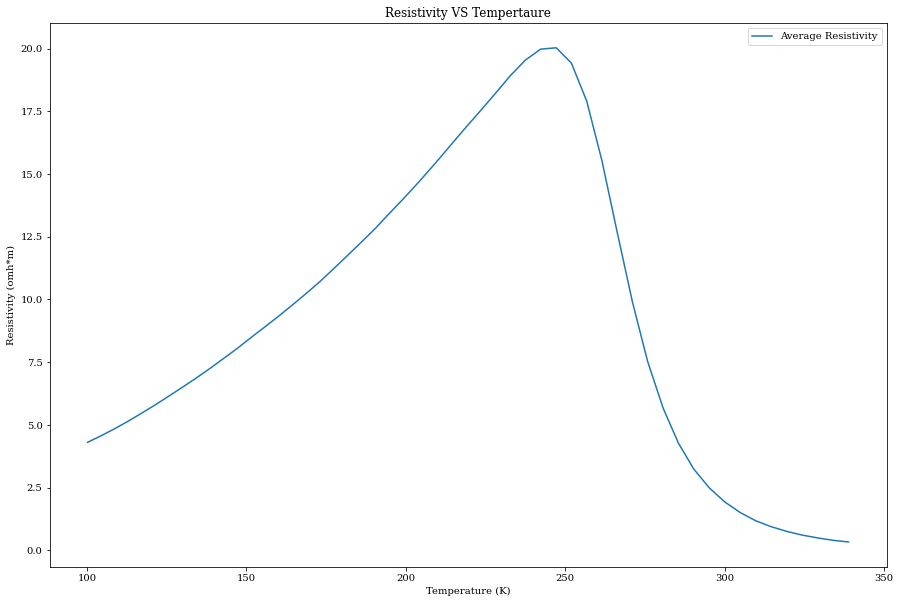

In [17]:
A_rho_ps=(rho(d,Iab1,Imab1,Iad1,Imad1,Vcd1,Vmcd1,Vbc1,Vmbc1)+rho(d,Iab2,Imab2,Iad2,Imad2,Vcd2,Vmcd2,Vbc2,Vmbc2)+rho(d,Iab3,Imab3,Iad3,Imad3,Vcd3,Vmcd3,Vbc3,Vmbc3)+rho(d,Iab4,Imab4,Iad4,Imad4,Vcd4,Vmcd4,Vbc4,Vmbc4)+rho(d,Iab5,Imab5,Iad5,Imad5,Vcd5,Vmcd5,Vbc5,Vmbc5))/5
A_rho_ng=(rho(d,Iabn1,Imabn1,Iadn1,Imadn1,Vcdn1,Vmcdn1,Vbcn1,Vmbcn1)+rho(d,Iabn2,Imabn2,Iadn2,Imadn2,Vcdn2,Vmcdn2,Vbcn2,Vmbcn2)+rho(d,Iabn3,Imabn3,Iadn3,Imadn3,Vcdn3,Vmcdn3,Vbcn3,Vmbcn3)+rho(d,Iabn4,Imabn4,Iadn4,Imadn4,Vcdn4,Vmcdn4,Vbcn4,Vmbcn4)+rho(d,Iabn5,Imabn5,Iadn5,Imadn5,Vcdn5,Vmcdn5,Vbcn5,Vmbcn5))/5
A_rho_0=(rho(d,Iab01,Imab01,Iad01,Imad01,Vcd01,Vmcd01,Vbc01,Vmbc01)+rho(d,Iab02,Imab02,Iad02,Imad02,Vcd02,Vmcd02,Vbc02,Vmbc02)+rho(d,Iab03,Imab03,Iad03,Imad03,Vcd03,Vmcd03,Vbc03,Vmbc03)+rho(d,Iab04,Imab04,Iad04,Imad04,Vcd04,Vmcd04,Vcd04,Vmbc04)+rho(d,Iab05,Imab05,Iad05,Imad05,Vcd05,Vmcd05,Vbc05,Vmbc05))/5

plt.plot(Temp_axis_ps1,A_rho_ps,label="Average Resistivity")
plt.title("Resistivity VS Tempertaure")
plt.xlabel("Temperature (K)")
plt.ylabel("Resistivity (omh*m)")
plt.legend()

## Plotting the natural log of inverse resistivity (aka conductivity=1/resistivity) vs. inverse temperature 
#### We will be fitting the linear part of this graph since this represents the intrinsic temperature region (region where the material acts as if it is not p-doped.

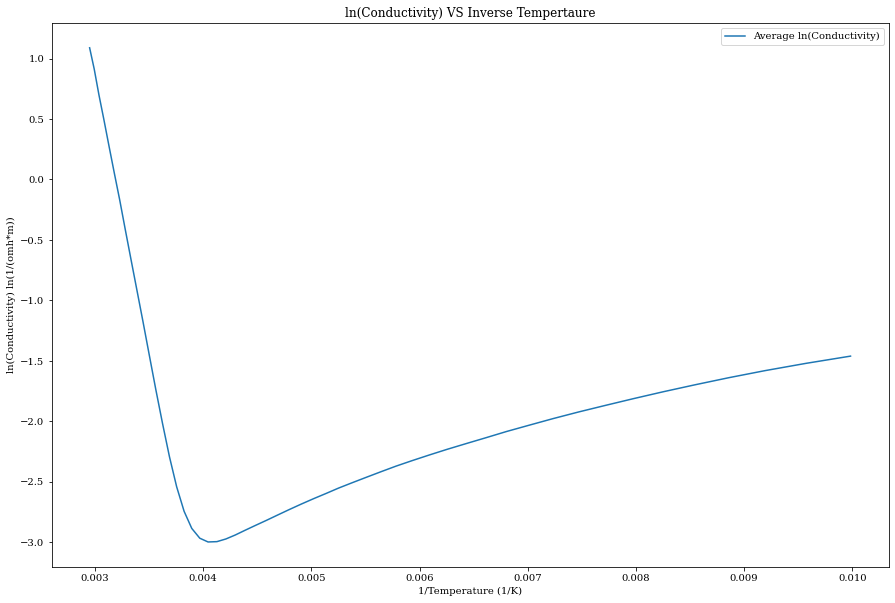

In [18]:
plt.plot(1/Temp_axis_ps1,np.log(1/A_rho_ps),label="Average ln(Conductivity)")
plt.title("ln(Conductivity) VS Inverse Tempertaure")
plt.xlabel("1/Temperature (1/K)")
plt.ylabel("ln(Conductivity) ln(1/(omh*m))")
plt.legend()

## Plotting the Hall Mobility as a function of temperture
#### This parameter describes the behavior of you guessed it, the mobility of the charge carriers with in the material

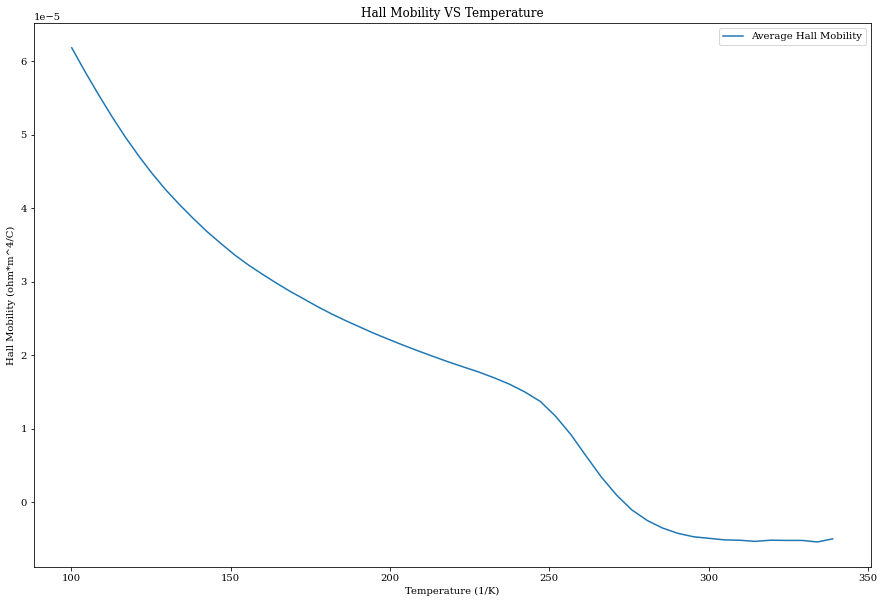

In [8]:
plt.plot(Temp_axis_ps1,A_RH_ps/A_rho_ps,label="Average Hall Mobility")
plt.title("Hall Mobility VS Temperature")
plt.xlabel("Temperature (1/K)")
plt.ylabel("Hall Mobility (ohm*m^4/C)")
plt.legend()

## Fitting slope to ln(Conductivity) vs. 1/T
#### We take the natural log of conductivity and inverse temperature since we know from the theory
$$ Conductivity \propto e^{\frac{-Eg}{2K_{B}T}}$$

In [24]:
T=1/Run1["Temperature (K)"][::3][36:54]
def e_func(T,a,b):
    return a*T+b
popt,pcov=sp.curve_fit(e_func,T,np.log(1/A_rho_ps[36:54]), sigma=None, absolute_sigma=False)
a_err_rho_ex, b_err_rho_ex= np.sqrt(np.diag(pcov))
print('a and b values for intrinsic n function',popt)
print('statistcal uncertainty of a and b values', a_err_rho_ex, b_err_rho_ex)
print('a = -Eg/2K =>  Experimental Eg for Germanium = 2aK =',-2*popt[0]*1.380649e-23)
print('Actual Eg for Germanium = 1.0735e-19')
print('So we got pretty close!')

a and b values for intrinsic n function [-4417.23097111    14.0847294 ]
statistcal uncertainty of a and b values 63.96415559764918 0.21716851268748855
a = -Eg/2K =>  Experimental Eg for Germanium = 2aK = 1.2197291046072298e-19
Actual Eg for Germanium = 1.0735e-19
So we got pretty close!
